# Decomposing Frequency Bands

*EEG has been known to show different characteristic waves across different frequencies. Each of these bands are associated with different aspects of the brain's function. MEG is similar, and shows the same properties<br>*
![image.png](img/eegbands.jpg) <br>
For example, alpha waves are dominant (high amplitudes) when one is in a meditative state. Theta waves are dominant when one is in deep REM sleep and so on

*Thus, the decomposing of the EEG waves proved fruitful for 2 reasons:-*
1. *It give more data to work with; Increases the dataset by 5 times for the 5 bands per sample.*
2. *It also offers up more information across each of the channels due to the inherent property of the EEG signal.*
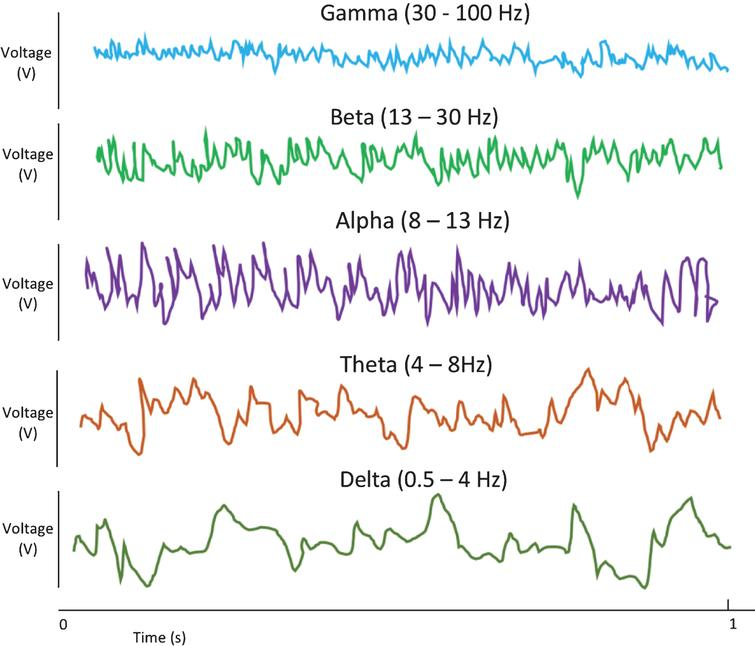

**Note**, the plots you see below are plotly images saved as png files. Run the cells yourselves to be able to view the interactiveplotly visual

In [20]:
import numpy as np
from scipy.io import loadmat
from scipy.signal import butter,filtfilt
import scipy.signal as sg
import plotly as py
import plotly.graph_objs as go
from plotly import tools
from scipy.fftpack import fft, ifft
from plotly.subplots import make_subplots

py.offline.init_notebook_mode(connected=True)


Importing the packages and data first

The Data is from a MATLAB file. Scipy is basically made for MATLAB users and has functions to get the data from such files

In [6]:
s1 = r'C:\Users\Aditi\Documents\Machine Learning\BCI Dataset\BCICIV_3_mat\S1.mat'
S1 = loadmat(s1)
#This returns a dictionary

In [7]:
type(S1)

dict

Having a look at how the data is structured

In [8]:
S1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'training_data', 'test_data', 'Info'])

In [9]:
S1['training_data']

array([[array([[[-297.02496777, -172.59669546,    8.8111787 , ...,
         -127.34400153, -133.92029563, -271.09608569],
        [-213.04541967, -166.2952056 ,  -80.16068552, ...,
           -1.91573482, -102.73957718, -203.83821956],
        [-172.61576855, -177.62592864, -125.51977427, ...,
           31.38495102,  -87.04445618, -168.42546773],
        ...,
        [ 167.58373583,  140.47006176,  227.68186367, ...,
          238.05687413,  247.07507371,  198.16262261],
        [ 158.94256923,  143.49661646,  254.17180068, ...,
          229.10071196,  140.90201523,  255.70245097],
        [ 172.06556018,  160.7894051 ,  225.68904865, ...,
          183.26635134,   87.61569121,  226.68444936]],

       [[  80.51935907,   21.98848015,   66.12954041, ...,
           41.0871519 ,   69.3544168 ,  158.75472383],
        [ 100.20039388,   72.79958406,  120.97717764, ...,
           60.13975632,   26.94694968,  189.95179999],
        [  74.0494067 ,   91.41015619,  147.25385658, ...,
      

In [10]:
S1['training_data'].shape

(1, 4)

The 4 corresponds to the 4 different classes

In [11]:
S1['Info']

array([[(array(['Classification of directionally modulated MEG activity.'],
      dtype='<U55'), array([[400]], dtype=uint16), array(['0.5 to 100 Hz, Butterworth, 3rd order'], dtype='<U37'), array(['motor areas mainly contralateral (unit: fT)'], dtype='<U43'), array([[array(['LC21'], dtype='<U4'), array(['LC22'], dtype='<U4'),
        array(['LC23'], dtype='<U4'), array(['LC31'], dtype='<U4'),
        array(['LC32'], dtype='<U4'), array(['LC41'], dtype='<U4'),
        array(['LC42'], dtype='<U4'), array(['RC41'], dtype='<U4'),
        array(['ZC01'], dtype='<U4'), array(['ZC02'], dtype='<U4')]],
      dtype=object), array([[-4.00000000e-01, -3.97518797e-01, -3.95037594e-01,
        -3.92556391e-01, -3.90075188e-01, -3.87593985e-01,
        -3.85112782e-01, -3.82631579e-01, -3.80150376e-01,
        -3.77669173e-01, -3.75187970e-01, -3.72706767e-01,
        -3.70225564e-01, -3.67744361e-01, -3.65263158e-01,
        -3.62781955e-01, -3.60300752e-01, -3.57819549e-01,
        -3.55338346e-0

Info key gives the relevant information about the data, like the filter and sampling frequency. It also gives us the time co-ordinate to visualize against the right time (pretty convenient damn)

**Plotting a single sample**

In [38]:
print(S1['training_data'][0].shape)
print(S1['training_data'][0][0].shape)
print(S1['training_data'][0][2].shape)
print(S1['training_data'][0][3][12].shape)

(4,)
(40, 400, 10)
(40, 400, 10)
(400, 10)


As you can see, the hierarchy is 0 to get into the array, the next index is to choose the class (0-4) the next index is to choose the sample (40 samples in total per class) <br>
Each sample is 400 data points long and also has 10 channels corresponding to locations of the electrode on the scale

In [23]:
sample = S1['training_data'][0][0][1]
sample.shape
#0 for the first row of data, 0th class ('right' direction) and the corresponding 1st sample has the following size

(400, 10)

We don't need all 10 channels.
Taking the 0th channel

In [24]:
sample = sample[:,0]
sample.shape

(400,)

In [27]:
time = S1['Info'][0][0][5][0]
time.shape

(400,)

Plotting using plotly

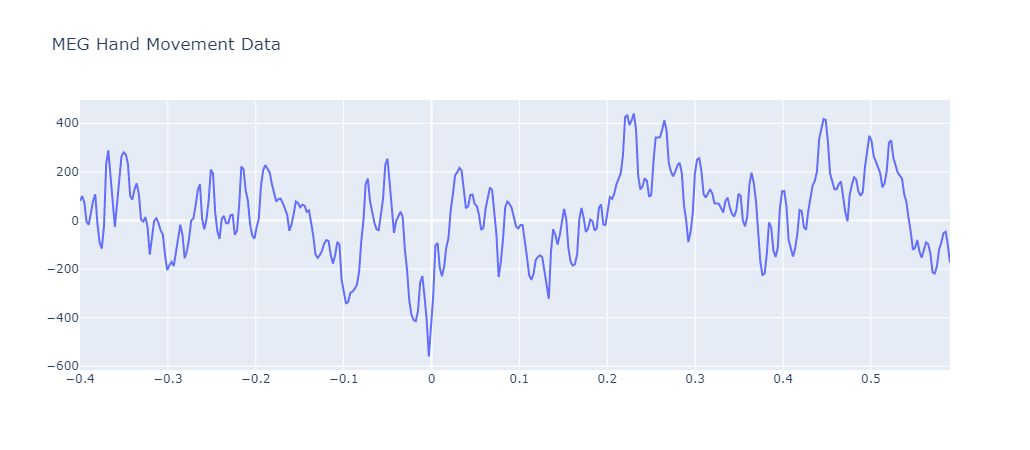

In [29]:
#Plot EEG Data
layout = go.Layout(title = 'MEG Hand Movement Data')

trace = go.Scatter(
    x = time,
    y = sample,
    mode = 'lines'
)

fig = go.Figure(data = [trace], layout = layout)
py.offline.iplot(fig)


In [50]:
![image](img/plot1.png)

'[image]' is not recognized as an internal or external command,
operable program or batch file.


#### Plotting all 10 channels of the sample

In [31]:
y = S1['training_data'][0][0][12]
y.shape

(400, 10)

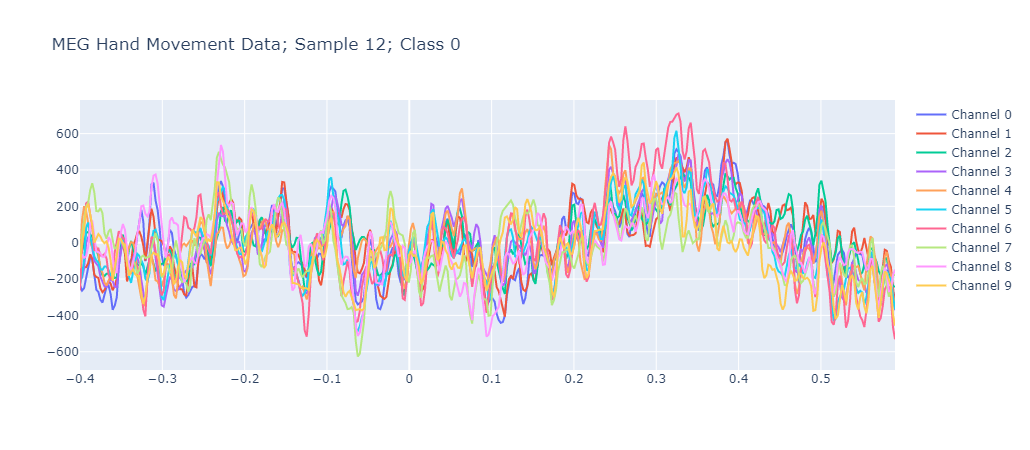

In [33]:
layout = go.Layout(title = 'MEG Hand Movement Data; Sample 12; Class 0')

data=[]

for i in range(10):
    trace = go.Scatter(
        x = time,
        y = y[:,i],
        name = 'Channel '+str(i),
        mode = 'lines'
    )
    data.append(trace)

fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)


![image](img/plot2.png)

(Double click on any one sample to view it separately)

#### Plotting different samples

In [34]:
y = S1['training_data'][0][0]
print(y.shape)

(40, 400, 10)

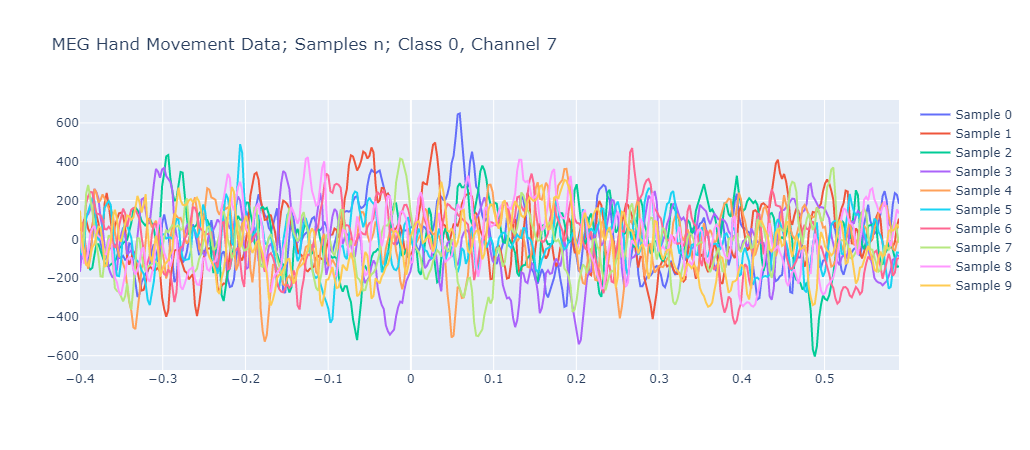

In [39]:
layout = go.Layout(title = 'MEG Hand Movement Data; Samples n; Class 0, Channel 7')

data=[]

for i in range(10):
    trace = go.Scatter(
        x = time,
        y = y[i, :, 7],
        name = 'Sample '+str(i),
        mode = 'lines'
    )
    data.append(trace)

fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)


![image](img/plot3.png)

#### Observations
- From the above 2 plots, we can see that the variance across samples is high, as expected <br>
- Also  from the first plot, across the channels, we see that the variance is low. Since they belong to the same class, we can concatenate these channels to get 40x10 samples per Class rather than just 40 samples with 10 channels each <br>
(I actually tried to use just these 40 samples with 10 samples each and got a ridiculously low accuracy, so trust me - Concatenating works)

### Plotting each frequency band

In [44]:
# Generic function to apply a ButterWorth filter; makes life easier 
def butter_lowpass_filter(data, cutoff, fs, order, btype='low'):
    nyq = 0.5*fs
    normal_cutoff = cutoff / nyq
    # For all MATLAB users, these functions should look familiar. Scipy is pretty close to MATLAB functions for Python
    b, a = butter(order, normal_cutoff, btype, analog=False)
    y = filtfilt(b, a, data)
    return y

I created the following function to plot the bands easily in a visible manner.

In [48]:
def plot_eeg_split(data, tim, fs = 400, order = 3, plotshow = True, ret = False):

    #Filter the data based on the different cut-off frequencies for each MEG band
    cutoffd = np.array([0.5,4])
    delta = butter_lowpass_filter(data, cutoffd, fs, order,'bandpass')
    
    cutofft = np.array([4,7.5])
    theta = butter_lowpass_filter(data, cutofft, fs, order,'bandpass')
    
    cutoffa = np.array([7.5,12])
    alpha = butter_lowpass_filter(data, cutoffa, fs, order,'bandpass')
    
    cutoffb = np.array([12,30])
    beta = butter_lowpass_filter(data, cutoffb, fs, order,'bandpass')
    
    cutoffg = np.array([30,75])
    gamma = butter_lowpass_filter(data, cutoffg, fs, order,'bandpass')
    
    
    #Plot the data sequentially using subplots
    if plotshow:
        fig = go.Figure()
        fig = make_subplots(rows=6, cols=1,shared_xaxes=True, vertical_spacing=0.05,
                        subplot_titles=("Full Signal","Delta","Theta", "Alpha","Beta","Gamma"))

        fig.append_trace(go.Scatter(
            x = tim,        
            y = data,
                    line =  dict(shape =  'spline' ),
                    name = 'OG signal'
                    ),row=1,col=1)

        fig.append_trace(go.Scatter(
                    x = tim,   y = delta,
                    line =  dict(shape =  'spline' ),
                    name = 'fsignal; cutoff =  '+ str(cutoffd)
                    ),row=2,col=1)

        fig.append_trace(go.Scatter(
                    x = tim,   y = theta,
                    line =  dict(shape =  'spline' ),
                    name = 'fsignal; cutoff =  '+ str(cutofft)
                    ),row=3,col=1)

        fig.append_trace(go.Scatter(
                    x = tim,   y = alpha,
                    line =  dict(shape =  'spline' ),
                    name = 'fsignal; cutoff =  '+ str(cutoffa)
                    ),row=4,col=1)

        fig.append_trace(go.Scatter(
                    x = tim,   y = beta,
                    line =  dict(shape =  'spline' ),
                    name = 'fsignal; cutoff =  '+ str(cutoffb)
                    ),row=5,col=1)

        fig.append_trace(go.Scatter(
                    x = tim,   y = gamma,
                    line =  dict(shape =  'spline' ),
                    name = 'fsignal; cutoff =  '+ str(cutoffg)
                    ),row=6,col=1)

        fig.update_layout(
            autosize=False,
            width=980,
            height=800,
        )
        fig.show()
    
    #Return the filtered data to form the channels for the dataset
    if ret:
        return np.array([alpha, beta, gamma, delta, theta]).transpose()

In [46]:
sample.shape

(400,)

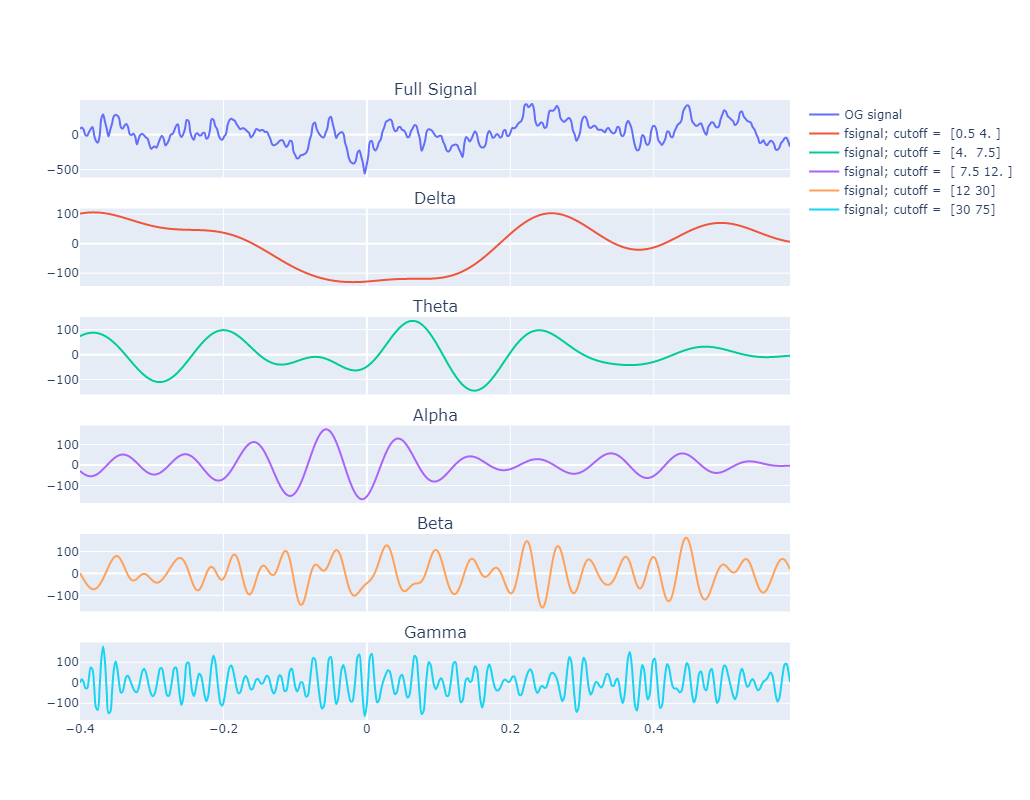

In [49]:
plot_eeg_split(sample, time)

![image](img/plot4.png)

Looks pretty similar to the picture above right?

**So these are the different frequency bands for the given MEG waveform.** <br>
**This offers up a lot more information, and a different interpretation of the raw data. This will help the neural network model find relevant patterns in the data easier.**

Try it out for different samples!